In [1]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import ensemble
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('data/PBP - 2016 - Week 1.csv')

df = df.dropna()
# week2 = pd.read_csv('PBP - 2016 - Week 2.csv')

# df = pd.concat([week1,week2],ignore_index=True)

In [5]:
df['type'].unique()

array(['Kickoff', 'Timeout', 'Rush', 'Punt', 'Pass Reception', 'Penalty',
       'Pass Incompletion', 'Rushing Touchdown', 'Field Goal Good',
       'Passing Touchdown', 'Fumble Recovery (Own)', 'End Period', 'Sack',
       'End of Half', 'Fumble Recovery (Opponent)', 'End of Game',
       'Field Goal Missed', 'Safety', 'Pass Interception Return',
       'Blocked Field Goal', 'Defensive 2pt Conversion',
       'Kickoff Return (Offense)', 'Interception Return Touchdown',
       'Kickoff Return Touchdown', 'Punt Return Touchdown',
       'Blocked Punt', 'Fumble Return Touchdown'], dtype=object)

In [6]:
df = df.replace('Pass Incompletion', 'Pass')
df = df.replace('Pass Reception', 'Pass')
df = df.replace('Passing Touchdown', 'Pass')
df = df.replace('Rushing Touchdown', 'Rush')
df = df.replace('Sack', 'Pass')
df['type'].unique()

array(['Kickoff', 'Timeout', 'Rush', 'Punt', 'Pass', 'Penalty',
       'Field Goal Good', 'Fumble Recovery (Own)', 'End Period',
       'End of Half', 'Fumble Recovery (Opponent)', 'End of Game',
       'Field Goal Missed', 'Safety', 'Pass Interception Return',
       'Blocked Field Goal', 'Defensive 2pt Conversion',
       'Kickoff Return (Offense)', 'Interception Return Touchdown',
       'Kickoff Return Touchdown', 'Punt Return Touchdown',
       'Blocked Punt', 'Fumble Return Touchdown'], dtype=object)

In [7]:
df

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,...,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description
0,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,15:00,2016-09-03T06:36:41Z,Kickoff,1,10,35,10,86,"Drew Galitz kickoff for 61 yds , Shakeir Ryan ..."
1,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Timeout,1,10,86,0,86,"Timeout NORTHWESTERN ST, clock 14:55"
2,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Rush,1,10,86,-1,87,De'Mard Llorens run for a loss of 1 yard to th...
3,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Rush,2,11,87,8,79,De'Mard Llorens run for 8 yds to the NWSt 21
4,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Rush,3,3,79,0,79,De'Mard Llorens run for no gain to the NWSt 21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16136,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,...,4,3:18,2016-09-04T08:15:02Z,Rush,1,10,33,15,48,B.J. Smith run for 15 yds to the Troy 48 for a...
16137,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,...,4,3:18,2016-09-04T08:15:02Z,Rush,1,10,48,3,51,B.J. Smith run for 3 yds to the APeay 49
16138,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,...,4,3:18,2016-09-04T08:15:02Z,Rush,2,7,51,-2,49,B.J. Smith run for a loss of 2 yards to the Tr...
16139,400869810,2016,1,2653,Troy,TROY,2046,Austin Peay,PEAY,25,...,4,3:18,2016-09-04T08:15:02Z,Rush,3,9,49,8,57,B.J. Smith run for 8 yds to the APeay 43


In [8]:
new_df = df[['quarter', 'down', 'distance', 'yardLine', 'clock', 'type']]

In [9]:
def seconds_left_in_quarter(clock):
    clock = clock.split(':')
    clock = (int(clock[0])*60) + int(clock[1])
    return clock

In [10]:
seconds_left_in_quarter('15:20')

920

In [11]:
for index,row in new_df.iterrows():
    new_df.at[index,'clock'] = seconds_left_in_quarter(row['clock'])

In [12]:
new_df

,quarter,down,distance,yardLine,clock,type
0,1,1,10,35,900,Kickoff
1,1,1,10,86,895,Timeout
2,1,1,10,86,895,Rush
3,1,2,11,87,895,Rush
4,1,3,3,79,895,Rush
...,...,...,...,...,...,...
16136,4,1,10,33,198,Rush
16137,4,1,10,48,198,Rush
16138,4,2,7,51,198,Rush
16139,4,3,9,49,198,Rush


In [13]:
new_df = new_df[(new_df.type == 'Pass') | (new_df.type == 'Rush')]

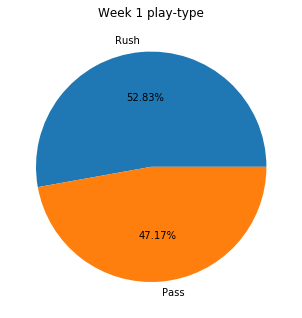

In [14]:
rel_freq = new_df['type'].value_counts()

plt.pie(rel_freq, labels = ('Rush', 'Pass'), autopct='%.2f%%')
plt.title("Week 1 play-type")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [15]:
training_features = new_df[['quarter','down','distance','yardLine', 'clock']]

training_label = new_df['type']


In [16]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.005)

gbr.fit(training_features, training_label)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
prediction = gbr.predict(training_features)

accuracy = accuracy_score(training_label, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 62.56%


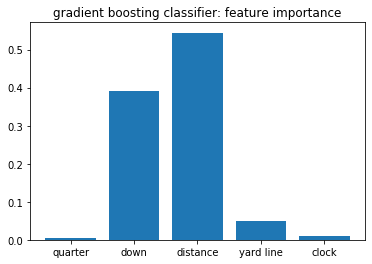

In [18]:
features = ['quarter', 'down', 'distance', 'yard line', 'clock']
feature_importance = gbr.feature_importances_.tolist()

plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

## Testing with week 2

In [19]:
def make_new_validation(df):
    df = df.replace('Pass Incompletion', 'Pass')
    df = df.replace('Pass Reception', 'Pass')
    df = df.replace('Passing Touchdown', 'Pass')
    df = df.replace('Rushing Touchdown', 'Rush')
    df = df.replace('Sack', 'Pass')
    for index,row in df.iterrows():
        df.at[index,'clock'] = seconds_left_in_quarter(row['clock'])
    new_df = df[['quarter', 'down', 'distance', 'yardLine', 'clock', 'type']]
    new_df = new_df[(new_df.type == 'Pass') | (new_df.type == 'Rush')]
    features = new_df[['quarter','down','distance','yardLine', 'clock']]
    labels = new_df['type']
    return features, labels
    

In [21]:
week2 = pd.read_csv('data/PBP - 2016 - Week 2.csv')
week2_features, week2_labels = make_new_validation(week2)

In [22]:
prediction = gbr.predict(week2_features)

accuracy = accuracy_score(week2_labels, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 61.96%


In [24]:
week3 = pd.read_csv('data/PBP - 2016 - Week 3.csv')
week3_features, week3_labels = make_new_validation(week3)

In [32]:
prediction = gbr.predict(week3_features)

accuracy = accuracy_score(week3_labels, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))


Accuracy: 62.51%


In [33]:
new_pred = np.where(prediction=='Rush', False, prediction) 
new_pred = np.where(new_pred=='Pass', True, new_pred) 

new_leb = np.where(week3_labels=='Pass', True, week3_labels) 
new_leb = np.where(new_leb=='Rush', False, new_leb) 

In [34]:
new_pred.astype('bool')

array([False, False,  True, ..., False, False,  True])

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(new_leb.astype('bool'), new_pred.astype('bool'))

0.6082527014007376

In [29]:
all_week = pd.concat([df, week2, week3])

In [30]:
all_train_features, all_train_labels = make_new_validation(all_week)

In [31]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.005)

gbr.fit(all_train_features, all_train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
import pickle
filename = 'models/predict_play.sav'
pickle.dump(gbr, open(filename, 'wb'))